In [2]:
import array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Understanding data type and structure in Python

### Basic data types

In [3]:
var = "Hello World!" # string
var = 15.5 # float
var = 2 # int
var = True # boolean
var = None

In [4]:
l1 = [1, 2, 3]
l2 = list(range(10)) 
l3 = [True, "2", 3.0, 4] 
print(l1)
print(l2)

[1, 2, 3]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [5]:
type(l1)

list

### Fixed-type arrarys in Python

In [6]:
A = array.array('i', l2)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Creating arrays

In [7]:
np.zeros(10, dtype=int)

np.ones((3, 5), dtype=float)

np.full((3, 5), 3.14)

np.random.randint(0, 10, (3, 3))

array([[1, 1, 3],
       [6, 2, 6],
       [6, 3, 0]])

### Pandas objects

In [8]:
S = pd.Series([1, 2, 3, 4.0])
S

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [9]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.337744,0.412018
b,0.194849,0.037078
c,0.119734,0.355368


## Getting started with data manipulation in Python

### Importing data

In [10]:
ICEdata = pd.read_csv("/Users/yanzhen/Desktop/ICE1_Data.csv")
ICEdata

,DBN,Quality_Review_Score,Progress_Rpt_10-11,Student_Progress_10-11,graduation 2010-11,college enroll 2010-11
0,01M292,Developing,C,C,0.563,0.519
1,01M448,Developing,C,B,0.707,0.363
2,01M450,Well Developed,A,B,0.716,0.692
3,01M509,Proficient,C,C,0.564,0.477
4,01M539,Proficient,A,A,0.953,0.870
...,...,...,...,...,...,...
417,10X696,Well Developed,A,A,1.000,0.936
418,13K430,Proficient,B,B,0.977,0.867
419,10X445,Well Developed,A,A,1.000,0.994
420,14K449,Well Developed,B,B,0.914,0.961


## Let's try some simple data wrangling

### Quick-and-dirty summary

In [14]:
ICEdata.describe(include = 'all')

,DBN,Quality_Review_Score,Progress_Rpt_10-11,Student_Progress_10-11,graduation 2010-11,college enroll 2010-11
count,422,368,310,310,310.000000,291.000000
unique,422,6,5,5,NaN,NaN
top,28Q690,Proficient,A,C,NaN,NaN
freq,1,186,109,93,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.737977,0.531196
std,NaN,NaN,NaN,NaN,0.143356,0.193129
min,NaN,NaN,NaN,NaN,0.412000,0.141000
25%,NaN,NaN,NaN,NaN,0.625250,0.391000
50%,NaN,NaN,NaN,NaN,0.726000,0.489000
75%,NaN,NaN,NaN,NaN,0.850750,0.656000


In [15]:
print(ICEdata['Quality_Review_Score'].unique())

['Developing' 'Well Developed' 'Proficient' nan 'Underdeveloped'
 'Outstanding (only an option in 2007-8)'
 'Underdeveloped with Proficient Features (only an option in 2007-8, 2008-9 and 2009-10)']


In [16]:
ICEdata['Quality_Review_Score'].value_counts()

Proficient                                                                                186
Well Developed                                                                            108
Developing                                                                                 64
Underdeveloped                                                                              6
Outstanding (only an option in 2007-8)                                                      3
Underdeveloped with Proficient Features (only an option in 2007-8, 2008-9 and 2009-10)      1
Name: Quality_Review_Score, dtype: int64

### Selecting limited variables

In [17]:
qualityEnroll = graduationEnroll = ICEdata[['Quality_Review_Score', 'graduation 2010-11', 'college enroll 2010-11']]
qualityEnroll

,Quality_Review_Score,graduation 2010-11,college enroll 2010-11
0,Developing,0.563,0.519
1,Developing,0.707,0.363
2,Well Developed,0.716,0.692
3,Proficient,0.564,0.477
4,Proficient,0.953,0.870
...,...,...,...
417,Well Developed,1.000,0.936
418,Proficient,0.977,0.867
419,Well Developed,1.000,0.994
420,Well Developed,0.914,0.961


### Plotting something

<AxesSubplot:xlabel='graduation 2010-11', ylabel='college enroll 2010-11'>

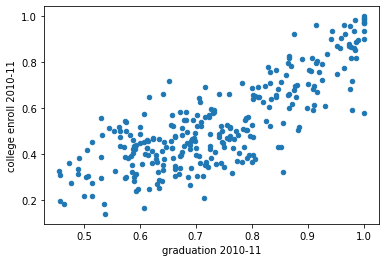

In [18]:
graduationEnroll.plot.scatter(x = 'graduation 2010-11', y = 'college enroll 2010-11')

<AxesSubplot:ylabel='Frequency'>

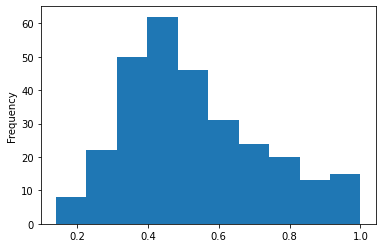

In [19]:
graduationEnroll['college enroll 2010-11'].plot.hist()